In [24]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import linregress

In [25]:
Zillow_Ohio_csv = "../Resources/newZillowOH_Data.csv"
crime2017_csv = "../Resources/OhioCrime2017_NoNan.csv"
crime2016_csv = "../Resources/OhioCrime2016_NoNan.csv"
crime2015_csv = "../Resources/OhioCrime2015_NoNan.csv"
crime2014_csv = "../Resources/OhioCrime2014_NoNan.csv"
crime2013_csv = "../Resources/OhioCrime2013_NoNan.csv"
crime2012_csv = "../Resources/OhioCrime2012_NoNan.csv"

In [26]:
zillow_df = pd.read_csv(Zillow_Ohio_csv)
crime2017_df = pd.read_csv(crime2017_csv)
crime2016_df = pd.read_csv(crime2016_csv)
crime2015_df = pd.read_csv(crime2015_csv)
crime2014_df = pd.read_csv(crime2014_csv)
crime2013_df = pd.read_csv(crime2013_csv)
crime2012_df = pd.read_csv(crime2012_csv)

crime2017_df = crime2017_df.fillna(0)
crime2016_df = crime2016_df.fillna(0)
crime2015_df = crime2015_df.fillna(0)
crime2014_df = crime2014_df.fillna(0)
crime2013_df = crime2013_df.fillna(0)
crime2012_df = crime2012_df.fillna(0)
zillow_df = zillow_df.fillna(0)

In [27]:
crime2017_df["POPULATION"] = pd.to_numeric(crime2017_df["POPULATION"])
crime2017_df["Crime_Rate2017"] = pd.to_numeric(crime2017_df["VIOLENT CRIME"])/crime2017_df["POPULATION"] *100000
crime2017_df = crime2017_df.sort_values("POPULATION",ascending=False)
top20_crime2017_df = crime2017_df.iloc[0:30]

crime2016_df["POPULATION"] = pd.to_numeric(crime2016_df["POPULATION"])
crime2016_df["Crime_Rate2016"] = pd.to_numeric(crime2016_df["VIOLENT CRIME"])/crime2016_df["POPULATION"] *100000
crime2016_df = crime2016_df.sort_values("POPULATION",ascending=False)
top20_crime2016_df = crime2016_df.iloc[0:30]

crime2015_df["POPULATION"] = pd.to_numeric(crime2015_df["POPULATION"])
crime2015_df["Crime_Rate2015"] = pd.to_numeric(crime2015_df["VIOLENT CRIME"])/crime2015_df["POPULATION"] *100000
crime2015_df = crime2015_df.sort_values("POPULATION",ascending=False)
top20_crime2015_df = crime2015_df.iloc[0:30]


crime2014_df["POPULATION"] = pd.to_numeric(crime2014_df["POPULATION"])
crime2014_df["Crime_Rate2014"] = pd.to_numeric(crime2014_df["VIOLENT CRIME"])/crime2014_df["POPULATION"] *100000
crime2014_df = crime2014_df.sort_values("POPULATION",ascending=False)
top20_crime2014_df = crime2014_df.iloc[0:30]



In [28]:
#Merging all cities
merge_Crime16_17_df = pd.merge(crime2017_df, crime2016_df, how='inner', left_on="City", right_on="City")
merge_Crime16_17_df.columns

merge_Crime16_17_15_df = pd.merge(merge_Crime16_17_df, crime2015_df, how='inner', left_on="City", right_on="City")
merge_Crime16_17_15_df.columns

merge_Crime_14_df = pd.merge(merge_Crime16_17_15_df, crime2014_df, how='inner', left_on="City", right_on="City")
merge_Crime_14_df.columns

#Merging the top 30 Cities
merge_top_Crime16_17_df = pd.merge(top20_crime2017_df, top20_crime2016_df, how='inner', left_on="City", right_on="City")
merge_top_Crime16_17_df.columns

merge_top_Crime16_17_15_df = pd.merge(merge_top_Crime16_17_df, top20_crime2015_df, how='inner', left_on="City", right_on="City")
merge_top_Crime16_17_15_df.columns

merge_top_Crime_14_df = pd.merge(merge_Crime16_17_15_df, top20_crime2014_df, how='inner', left_on="City", right_on="City")
merge_top_Crime_14_df.columns



Index(['Unnamed: 0_x', 'County_x', 'City', 'POPULATION_x', 'VIOLENT CRIME_x',
       'MURDER_x', 'RAPE_x', 'ROBBERY_x', 'AGGRAVATED ASSAULT_x',
       'Crime_Rate2017', 'Unnamed: 0_y', 'County_y', 'POPULATION_y',
       'VIOLENT CRIME_y', 'MURDER_y', 'RAPE_y', 'ROBBERY_y',
       'AGGRAVATED ASSAULT_y', 'Crime_Rate2016', 'Unnamed: 0_x', 'County_x',
       'POPULATION_x', 'VIOLENT CRIME_x', 'MURDER_x', 'RAPE_x', 'ROBBERY_x',
       'AGGRAVATED ASSAULT_x', 'Crime_Rate2015', 'Unnamed: 0_y', 'County_y',
       'POPULATION_y', 'VIOLENT CRIME_y', 'MURDER_y', 'RAPE_y', 'ROBBERY_y',
       'AGGRAVATED ASSAULT_y', 'Crime_Rate2014'],
      dtype='object')

In [6]:
#Merging all crime cities with Zillow
merge_Zillow_Crime_df = pd.merge(merge_Crime_14_df, zillow_df, how='inner', left_on="City", right_on="RegionName")
merge_Zillow_Crime_df.head()
merge_Zillow_Crime_df.to_csv("../Resources/mergeData/MergeCrime_Zillow.csv")
merge_Zillow_Crime_df.columns

merge_Zillow_Crime_df
#len(merge_Zillow_Crime_df)



,Unnamed: 0_x,County_x,City,POPULATION_x,VIOLENT CRIME_x,MURDER_x,RAPE_x,ROBBERY_x,AGGRAVATED ASSAULT_x,Crime_Rate2017,...,RegionID,RegionName,StateName,SizeRank,2012,2013,2014,2015,2016,2017
0,197,Franklin County,Columbus,872205,4478,142,919,1963,1454,513.411411,...,10920,Columbus,Ohio,15,1166700,1264400,1416700,1525200,1608000,1749600
1,117,Cuyahoga County,Cleveland,385351,5999,107,497,2697,2698,1556.762536,...,24115,Cleveland,Ohio,43,0,0,0,294300,486200,625500
2,257,Hamilton County,Cincinnati,299116,2833,70,292,1196,1275,947.124193,...,4099,Cincinnati,Ohio,53,0,0,0,0,0,1436800
3,381,Lucas County,Toledo,277116,2829,35,180,780,1834,1020.872126,...,34303,Toledo,Ohio,65,466700,550500,675400,771600,808800,861900
4,583,Summit County,Akron,197412,1377,42,209,395,731,697.525986,...,30141,Akron,Ohio,123,0,0,0,136400,577700,692400
5,144,Cuyahoga County,Parma,79340,141,0,39,37,65,177.716158,...,53812,Parma,Ohio,489,925100,969900,998200,1071500,1153100,1243300
6,,Butler County,Fairfield,75853,38,0,15,6,17,50.096898,...,45221,Fairfield,Ohio,1025,0,883600,1509200,1425100,1658600,1696900
7,566,Stark County,Canton,71031,836,16,97,188,535,1176.950909,...,51260,Canton,Ohio,200,0,0,0,0,0,719600
8,401,Mahoning County,Youngstown,63878,447,23,32,151,241,699.771439,...,28060,Youngstown,Ohio,628,0,0,0,164200,261300,308200
9,375,Lorain County,Lorain,63672,373,2,30,87,254,585.814801,...,32572,Lorain,Ohio,637,0,0,0,0,0,455400


In [29]:
#Merging top crime cities with zillow
merge_Zillow_top_Crime_df = pd.merge(merge_top_Crime_14_df, zillow_df, how='inner', left_on="City", right_on="RegionName")
merge_Zillow_top_Crime_df.head()
merge_Zillow_top_Crime_df.to_csv("../Resources/mergeData/MergeTopCrime_Zillow.csv")
merge_Zillow_top_Crime_df.columns


merge_Zillow_top_Crime_df
len(merge_Zillow_top_Crime_df)

22

In [61]:
#Retrieving data to plot for A City (index in the iLoc below will retrieve a City)
years =  ["2014","2015","2016","2017"]
#graphs10 = [0,1,2,3,4,5,6,7,8,9,10]

#for gCount in graphs10:
city1Data = merge_Zillow_Crime_df.iloc[9,:]
cityPercent = [city1Data["Crime_Rate2014"],city1Data["Crime_Rate2015"],city1Data["Crime_Rate2016"],city1Data["Crime_Rate2017"]]
housingMedian = [city1Data["2014"],city1Data["2015"],city1Data["2016"],city1Data["2017"]]
plot_mergeData_df = pd.DataFrame({"Years" : years, "CrimeRate" : cityPercent, "Housing_Median" : housingMedian })





<IPython.core.display.Javascript object>


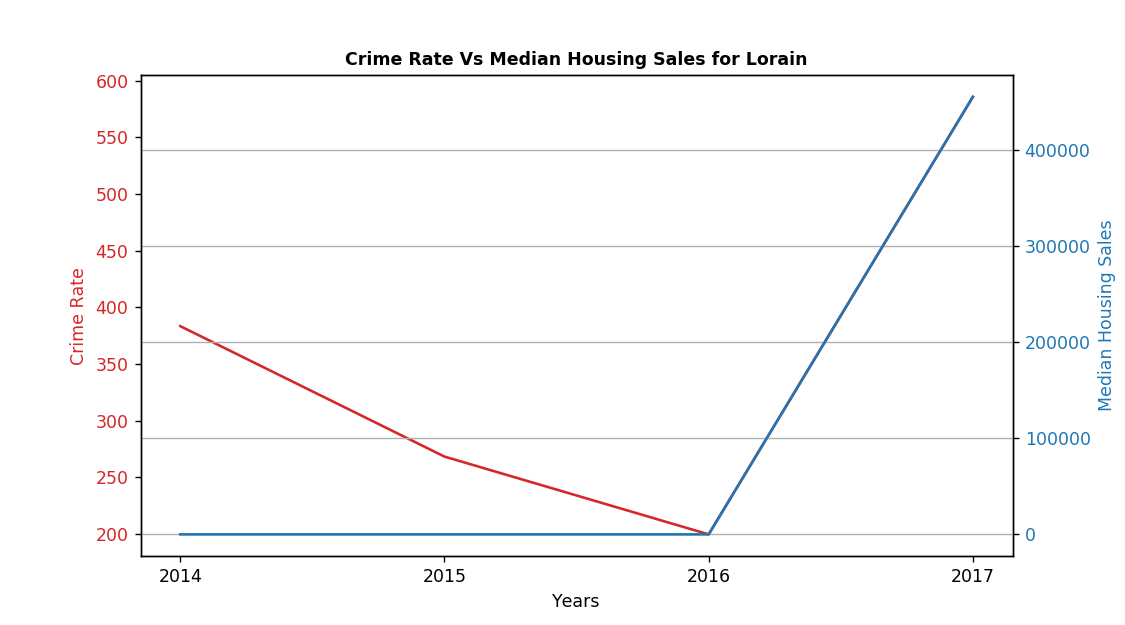

In [62]:
plot_years = plot_mergeData_df["Years"]
crimeRate = pd.to_numeric(plot_mergeData_df["CrimeRate"])
housingMedian =  plot_mergeData_df["Housing_Median"]
citiName = city1Data["City"]


fig, ax1 = plt.subplots(figsize=(9,5))

#Plotting Crime Percent
color = 'tab:red'
ax1.set_xlabel('Years')
ax1.set_ylabel('Crime Rate', color=color)
ax1.plot(plot_years, crimeRate, color=color)
ax1.tick_params(axis='y', labelcolor=color)

 # instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx() 

#Plotting Housing Median
color = 'tab:blue'
ax2.set_ylabel('Median Housing Sales', color=color)  # we already handled the x-label with ax1
ax2.plot(plot_years, housingMedian, color=color)
ax2.tick_params(axis='y', labelcolor=color)


#fig.tight_layout()
plt.grid(True)
plt.title("Crime Rate Vs Median Housing Sales for " + citiName,fontsize=10, fontweight="bold")

plt.savefig("images/plots/CrimeVsHousingMedian_Yearly_"+citiName+".png")





<IPython.core.display.Javascript object>


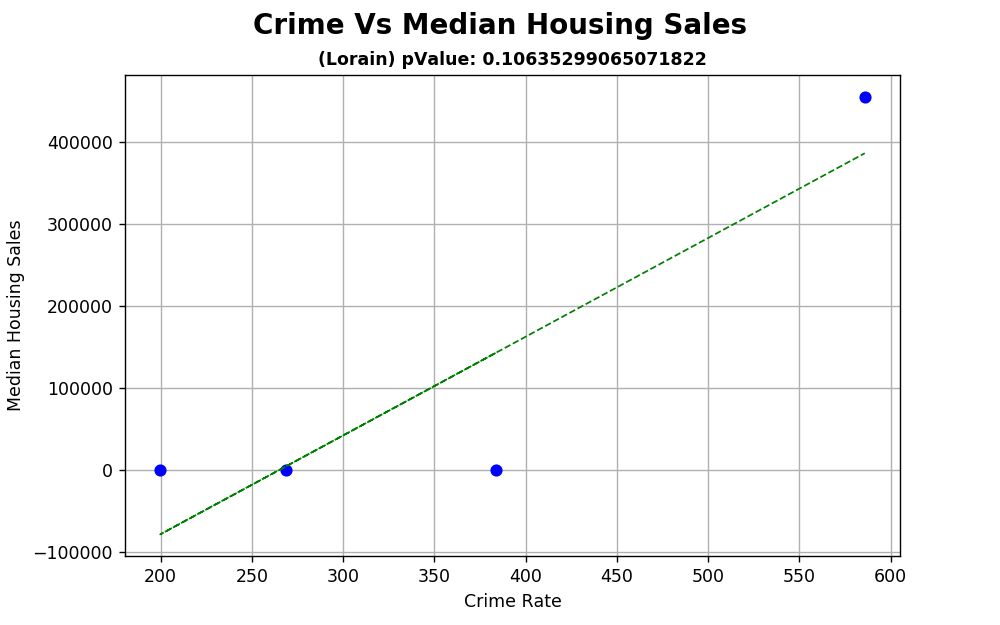

In [63]:
# Regression for Each City (over 3 years)
vc_slope, vc_int, vc_r, vc_p, vc_std_err = linregress(crimeRate, housingMedian)
fit = vc_slope * crimeRate + vc_int

# Plot data
fig, ax = plt.subplots(figsize=(8,5))

plt.suptitle("Crime Vs Median Housing Sales", fontsize=16, fontweight="bold")


ax.set_xlabel("Crime Rate")
ax.set_ylabel("Median Housing Sales")

ax.plot(crimeRate, housingMedian, linewidth=0, marker='o',color="b")
ax.plot(crimeRate, fit, 'g--', linewidth=1)

plt.grid(True)
plt.title("(" + citiName+") pValue: "+ str(vc_p),fontsize=10, fontweight="bold")

plt.savefig("images/plots/"+citiName+"_pValue.png")
plt.show()

In [11]:
city20 = merge_Zillow_Crime_df.head(20)
#city50.plot(x="City", y=["2017"], kind="bar", title="2017 Crime Rate")
#plt.show


<IPython.core.display.Javascript object>


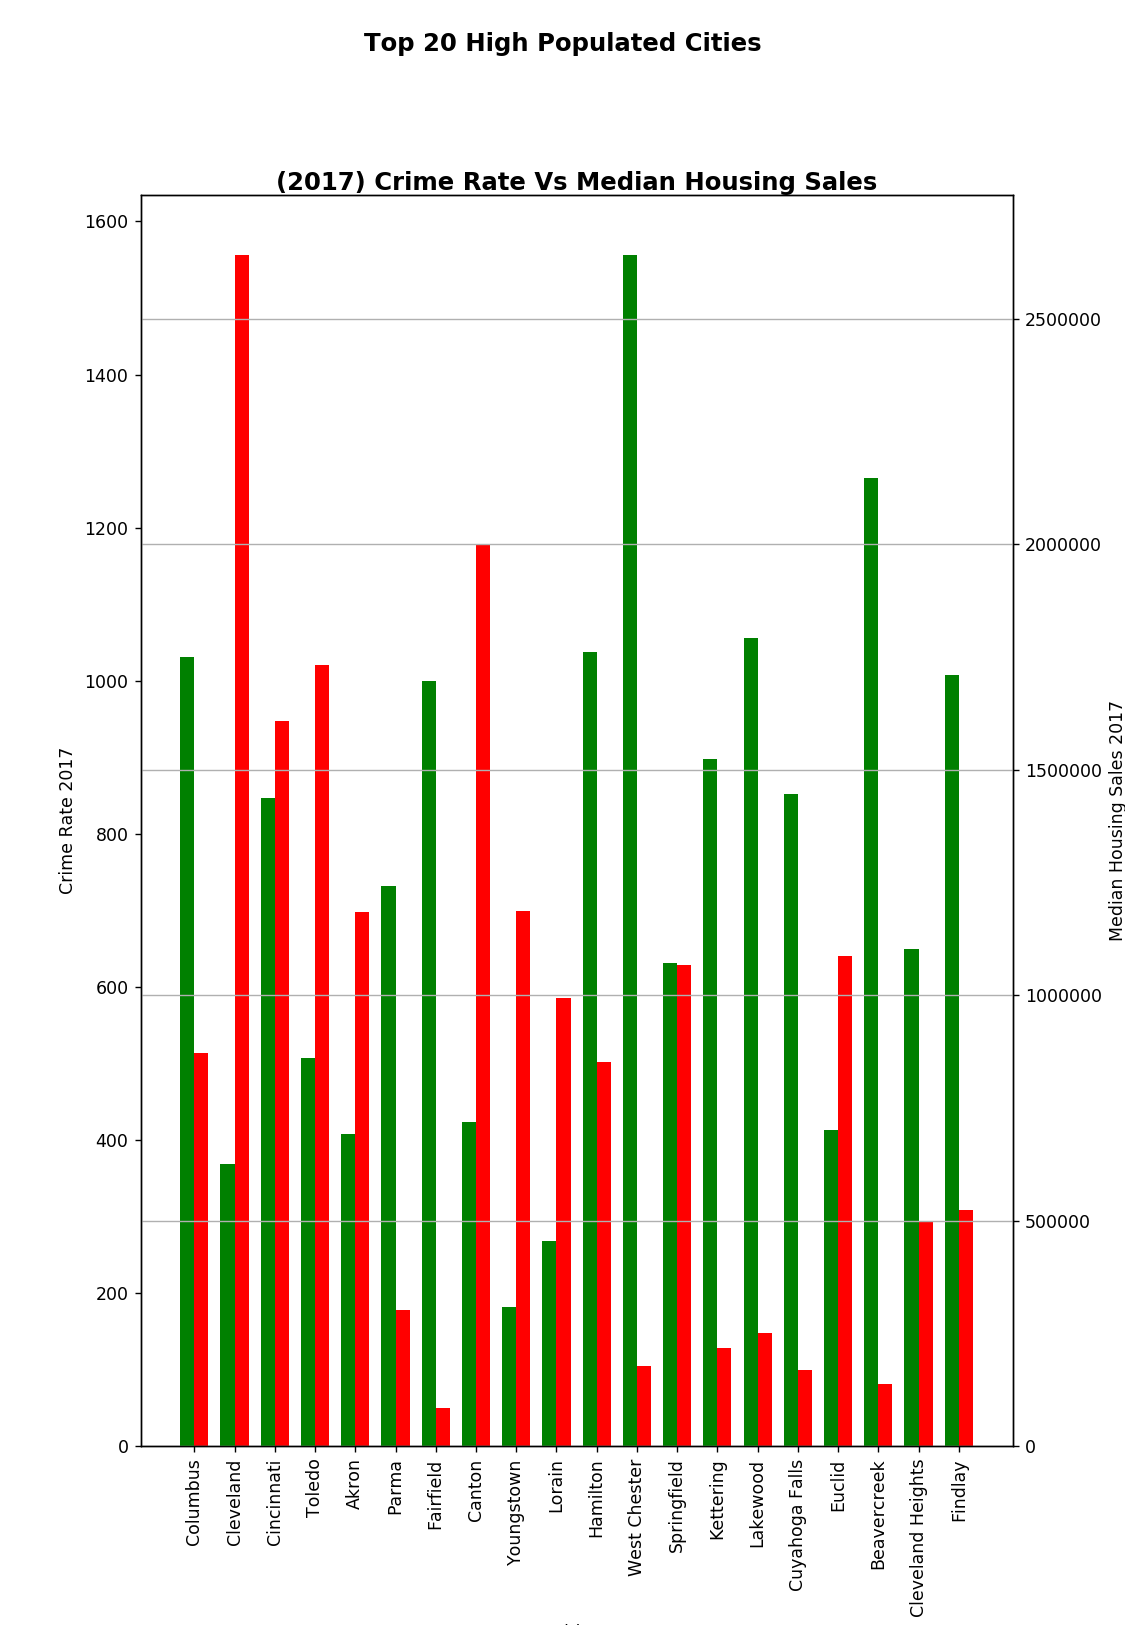

In [64]:
labelcity = city20["City"].tolist()
#print(labelcity)
#plottiing a graph for just 20 cities
crime20_rate2017 = pd.to_numeric(city20["Crime_Rate2017"])
housing20_median2017 = pd.to_numeric(city20["2017"])

x = np.arange(len(labelcity))  # the label locations
#print(x)
width = 0.35  # the width of the bars

fig, ax1 = plt.subplots(figsize=(9,13))
#Plotting Crime Percent
#color = 'tab:red'
ax1.set_xlabel('Cities')
ax1.set_ylabel('Crime Rate 2017')
ax1.bar(x + width/2, crime20_rate2017, width, label='Crime Rate', color='r')
ax1.set_xticks(x)
ax1.set_xticklabels(labelcity,rotation='vertical')

 # instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx() 

#Plotting Housing Median
#color = 'tab:blue'
ax2.set_ylabel('Median Housing Sales 2017')  # we already handled the x-label with ax1
ax2.bar(x - width/2, housing20_median2017, width, label='Housing Sale Median', color='g')

fig.suptitle("Top 20 High Populated Cities",fontsize=14, fontweight="bold",va='top')
#fig.tight_layout()
plt.grid(True)
plt.title("(2017) Crime Rate Vs Median Housing Sales", fontsize=14, fontweight="bold",va='top')

plt.show()

plt.savefig("images/plots/CrimeVsHousingMedian_2017_top20.png")

<IPython.core.display.Javascript object>


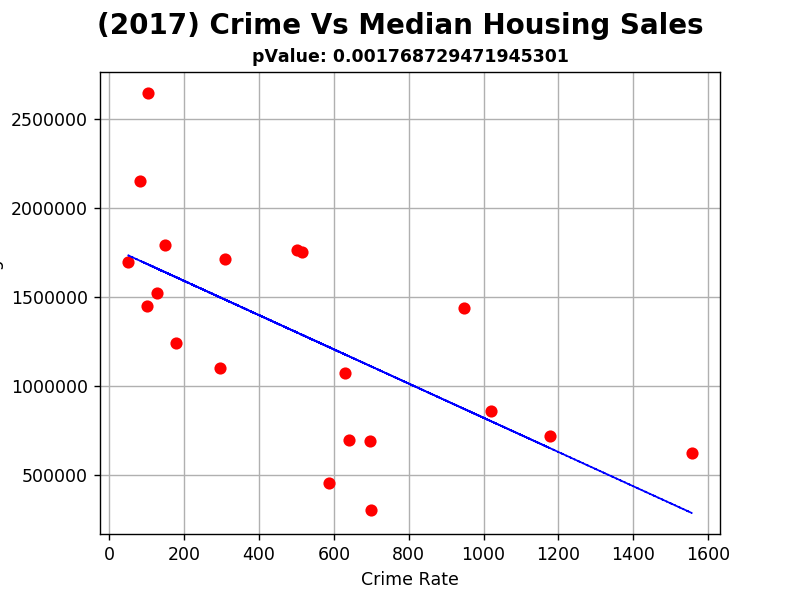

In [65]:
# Set line
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(crime20_rate2017, housing20_median2017)

fit = vc_slope * crime20_rate2017 + vc_int

# Plot data
fig, ax = plt.subplots()
fig.suptitle("(2017) Crime Vs Median Housing Sales", fontsize=16, fontweight="bold")

ax.set_xlabel("Crime Rate")
ax.plot(crime20_rate2017, housing20_median2017, linewidth=0, marker='o',color="r")
ax.plot(crime20_rate2017, fit, "b--", linewidth=1)
ax.set_ylabel("Median Housing Sales")
plt.grid(True)
plt.title("pValue: "+ str(vc_p),fontsize=10, fontweight="bold")
plt.show()

plt.savefig("images/plots/CrimeVsHousingMedian_2017_top20_PVALUE.png")

<IPython.core.display.Javascript object>


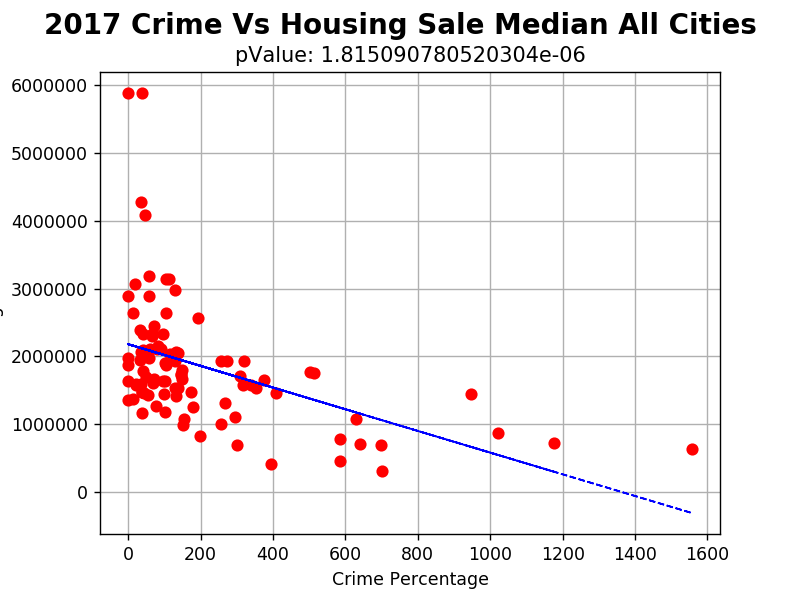

In [66]:
cityName = merge_Zillow_Crime_df["City"]
crimeRate2017 = merge_Zillow_Crime_df["Crime_Rate2017"]
housingMedian2017 =  merge_Zillow_Crime_df["2017"]

# Set line
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(crimeRate2017, housingMedian2017)

fit = vc_slope * crimeRate2017 + vc_int

# Plot data
fig, ax = plt.subplots()

fig.suptitle("2017 Crime Vs Housing Sale Median All Cities", fontsize=16, fontweight="bold")

#ax.set_xlim(0, 10)
#ax.set_ylim(0, 10)

ax.set_xlabel("Crime Percentage")


ax.plot(crimeRate2017, housingMedian2017, linewidth=0, marker='o',color="r")

ax.plot(crimeRate2017, fit, "b--", linewidth=1)
ax.set_ylabel("Housing Medians")
plt.grid(True)
plt.title("pValue: "+ str(vc_p))

plt.show()
plt.savefig("images/plots/CrimeVsHousingMedian_2017_All_PVALUE.png")

<IPython.core.display.Javascript object>


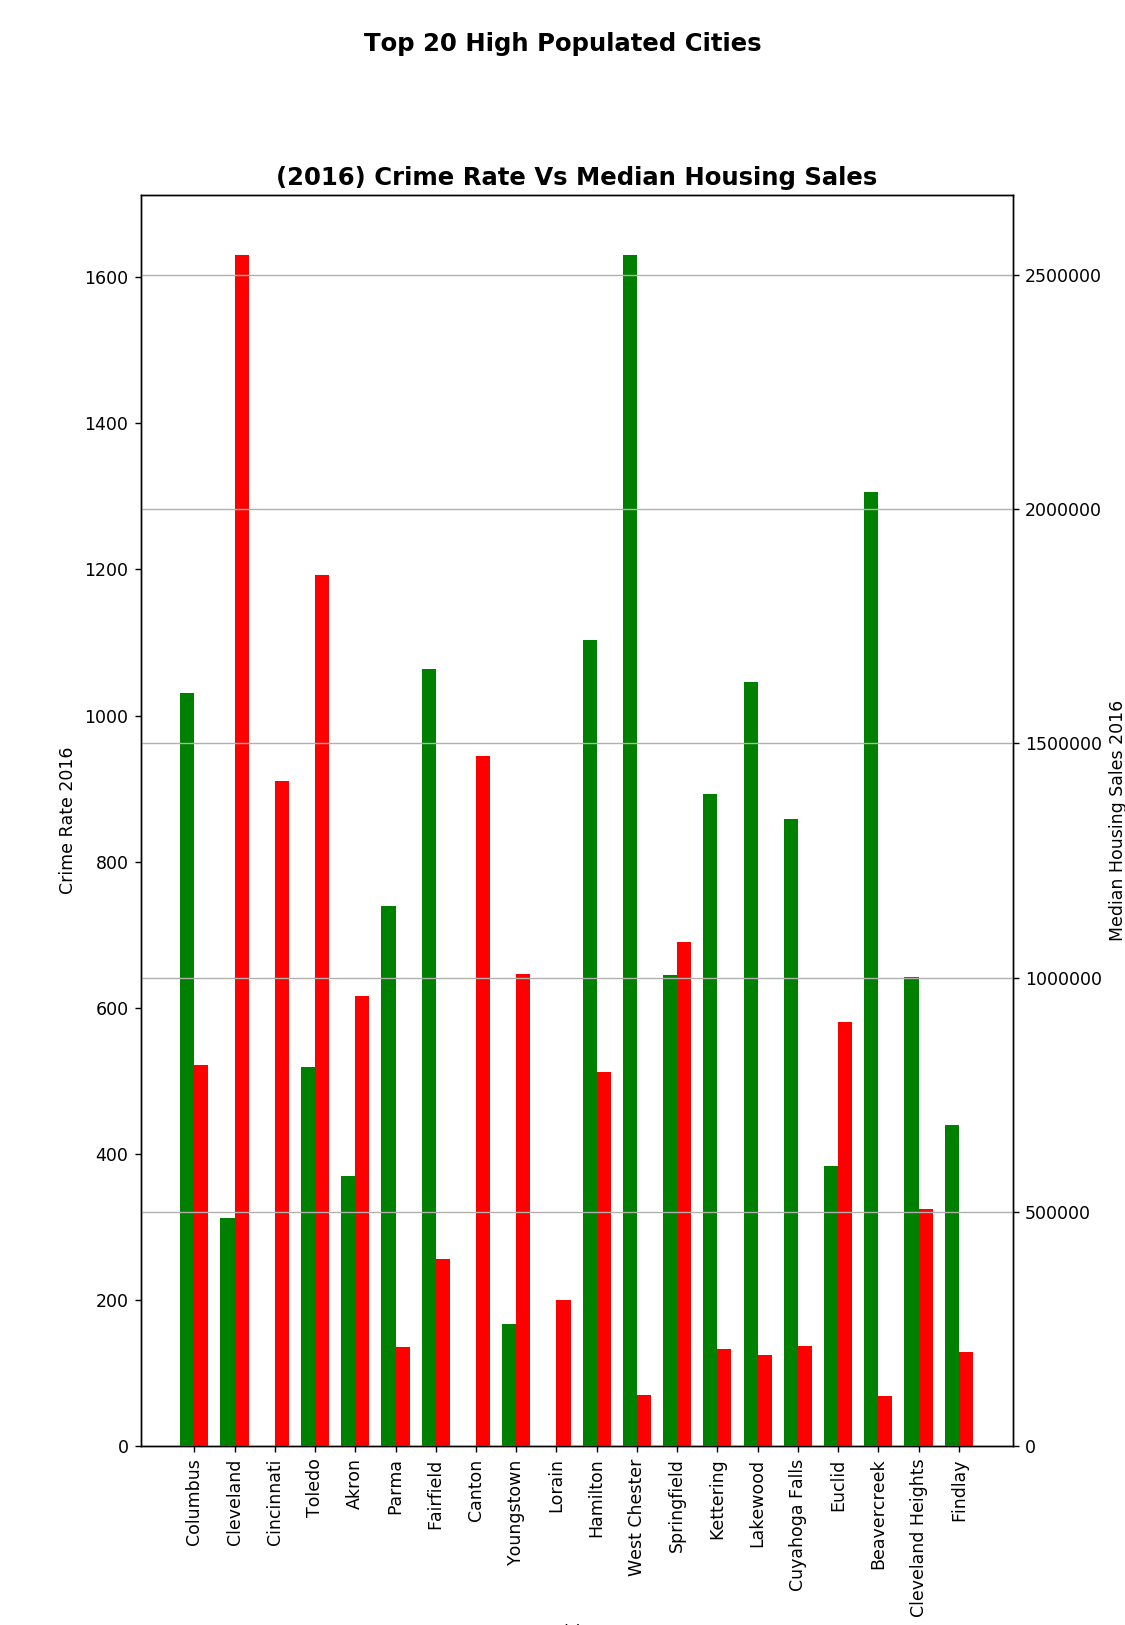

In [67]:
labelcity = city20["City"].tolist()
#print(labelcity)
#plottiing a graph for just 20 cities
crime20_rate2016 = pd.to_numeric(city20["Crime_Rate2016"])
housing20_median2016 = pd.to_numeric(city20["2016"])

x = np.arange(len(labelcity))  # the label locations
#print(x)
width = 0.35  # the width of the bars

fig, ax1 = plt.subplots(figsize=(9,13))
#Plotting Crime Percent
#color = 'tab:red'
ax1.set_xlabel('Cities')
ax1.set_ylabel('Crime Rate 2016')
ax1.bar(x + width/2, crime20_rate2016, width, label='Crime Rate', color='r')
ax1.set_xticks(x)
ax1.set_xticklabels(labelcity,rotation='vertical')

 # instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx() 

#Plotting Housing Median
#color = 'tab:blue'
ax2.set_ylabel('Median Housing Sales 2016')  # we already handled the x-label with ax1
ax2.bar(x - width/2, housing20_median2016, width, label='Housing Sale Median', color='g')

fig.suptitle("Top 20 High Populated Cities",fontsize=14, fontweight="bold")
#fig.tight_layout()
plt.grid(True)
plt.title("(2016) Crime Rate Vs Median Housing Sales", fontsize=14, fontweight="bold")

plt.show()
plt.savefig("images/plots/CrimeVsHousingMedian_2016_top20.png")

<IPython.core.display.Javascript object>


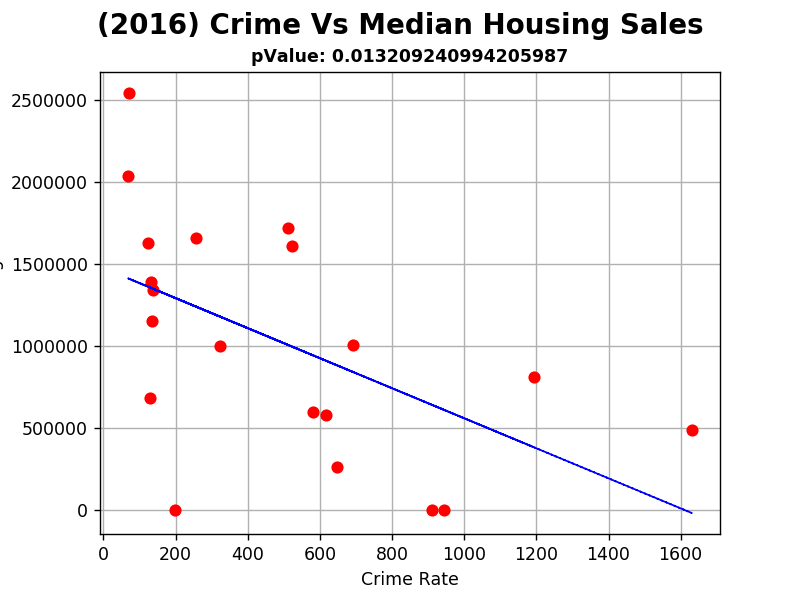

In [68]:
# Set line
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(crime20_rate2016, housing20_median2016)

fit = vc_slope * crime20_rate2016 + vc_int

# Plot data
fig, ax = plt.subplots()
fig.suptitle("(2016) Crime Vs Median Housing Sales", fontsize=16, fontweight="bold")

ax.set_xlabel("Crime Rate")
ax.plot(crime20_rate2016, housing20_median2016, linewidth=0, marker='o',color="r")
ax.plot(crime20_rate2016, fit, "b--", linewidth=1)
ax.set_ylabel("Median Housing Sales")
plt.grid(True)
plt.title("pValue: "+ str(vc_p),fontsize=10, fontweight="bold")
plt.show()

plt.savefig("images/plots/CrimeVsHousingMedian_2016_top20_PVALUE.png")

<IPython.core.display.Javascript object>


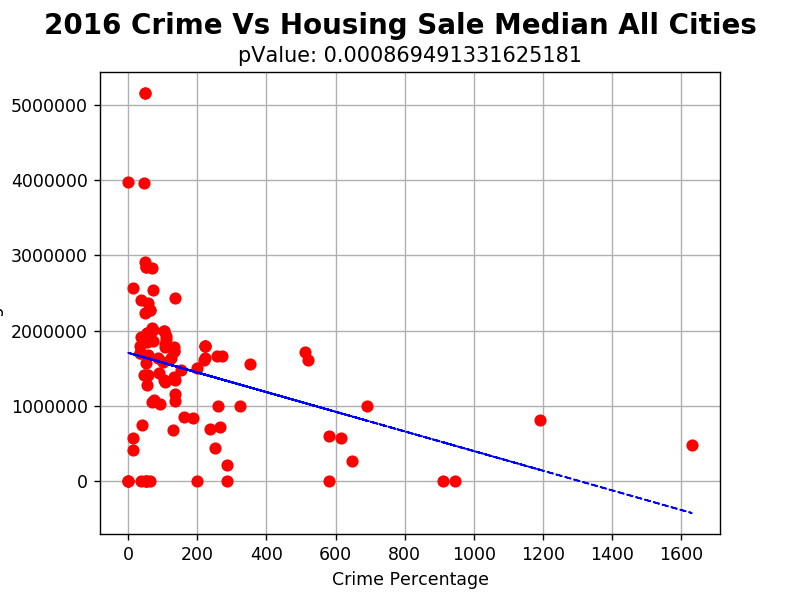

In [69]:
cityName = merge_Zillow_Crime_df["City"]
crimeRate2016 = merge_Zillow_Crime_df["Crime_Rate2016"]
housingMedian2016 =  merge_Zillow_Crime_df["2016"]


# Set line
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(crimeRate2016, housingMedian2016)

fit = vc_slope * crimeRate2016 + vc_int

# Plot data
fig, ax = plt.subplots()

fig.suptitle("2016 Crime Vs Housing Sale Median All Cities", fontsize=16, fontweight="bold")

#ax.set_xlim(0, 10)
#ax.set_ylim(0, 10)

ax.set_xlabel("Crime Percentage")


ax.plot(crimeRate2016, housingMedian2016, linewidth=0, marker='o',color="r")

ax.plot(crimeRate2016, fit, "b--", linewidth=1)
ax.set_ylabel("Housing Medians")
plt.grid(True)
plt.title("pValue: "+ str(vc_p))

plt.show()
plt.savefig("images/plots/CrimeVsHousingMedian_2016_All_PVALUE.png")